# SciPy Hierarchical Clustering and Dendrogram Tutorial

<https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/>


## Imports and Setup

In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scient

## Generating Sample Data

In [9]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

(150, 2)


## Perform the hierarchical clustering

In [3]:
# Ward is a linkage method
Z = linkage(X, 'ward')

#Z corresponds to [index1, index2, dist, sample_count]
Z[:5,:]

array([[52.     , 53.     ,  0.04151,  2.     ],
       [14.     , 79.     ,  0.05914,  2.     ],
       [33.     , 68.     ,  0.07107,  2.     ],
       [17.     , 73.     ,  0.07137,  2.     ],
       [ 1.     ,  8.     ,  0.07543,  2.     ]])

## Get the Cophenetic Correlation Coefficient

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
print(f"The cophenetic correlation coefficient {c}")


The cophenetic correlation coefficient 0.9800148387574268


## Plotting a Dendrogram

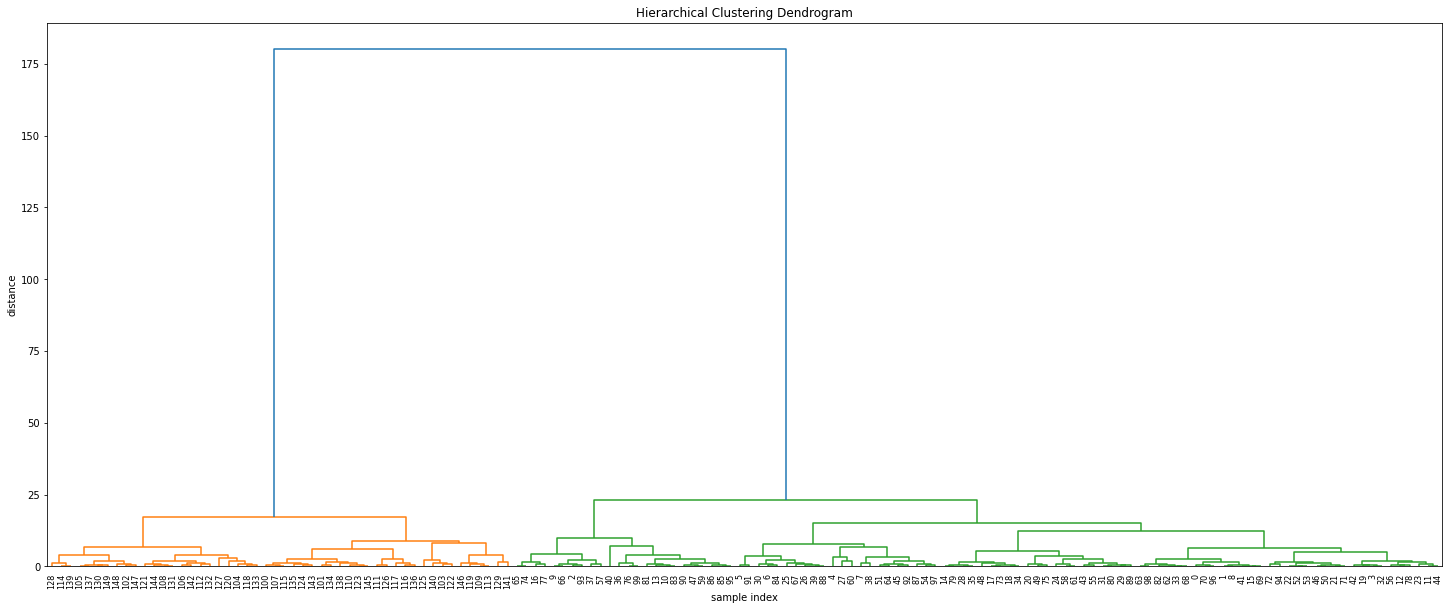

In [5]:
#calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()



/home/mladen/anaconda3/envs/datasci/lib/python3.9/site-packages/seaborn/matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


array([ 3,  3,  4,  3,  3,  2,  2,  4,  4,  3,  3,  4,  4,  4,  4,  4, 10,
        1,  8,  3,  2,  2,  2,  8,  8,  8,  2,  4,  4,  3,  3,  3,  3,  3,
        2,  5,  3,  4,  2,  3,  3,  2,  1,  2,  2,  2,  9,  8,  3,  2,  3,
        8,  2,  7,  6,  8], dtype=int32)

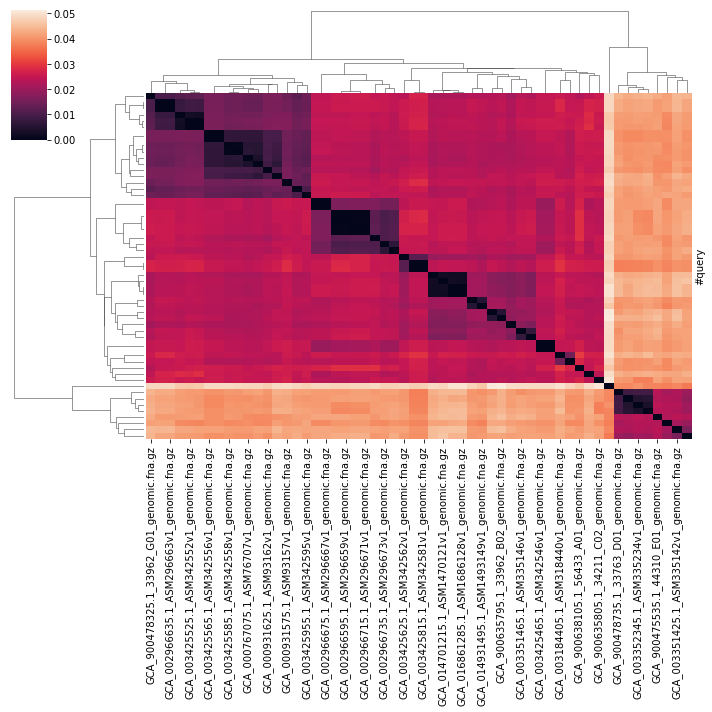

In [10]:
import pandas as pd
from  scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster, linkage
import seaborn as sns
df = pd.read_csv('/home/mladen/Strainr/testnewdb/genomes/mashtable.tsv',sep='\t',index_col=0)
g = sns.clustermap(df,xticklabels=2,yticklabels=False)

Z = linkage(squareform(df.values))
#Z
fcluster(Z, t=10,criterion='maxclust')

In [12]:
from sklearn.cluster import AffinityPropagation,DBSCAN
from sklearn import metrics
af = AffinityPropagation().fit(df.values)
af = DBSCAN().fit(df.values)
af.labels_
# cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

X = df.values
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# # Plot result
# import matplotlib.pyplot as plt
# from itertools import cycle

# plt.close('all')
# plt.figure(1)
# plt.clf()

# colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# for k, col in zip(range(n_clusters_), colors):
#     class_members = labels == k
#     cluster_center = X[cluster_centers_indices[k]]
#     plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
#     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#              markeredgecolor='k', markersize=14)
#     for x in X[class_members]:
#         plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()
# # sns.scatterplot(data=df)

/home/mladen/anaconda3/envs/datasci/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


NameError: name 'cluster_centers_indices' is not defined

In [13]:
af = DBSCAN(eps=0.02,min_samples=1).fit(X)
db = DBSCAN(eps=0.02, min_samples=1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

ValueError: Number of labels is 150. Valid values are 2 to n_samples - 1 (inclusive)

# Dendrogram and sklearn Hierarchical Clustering

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    print(np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float))
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data
X = df.values


NameError: name 'df' is not defined

In [36]:
   # compute the cluster representatives and build the cluster dictionary
X = df.values
model = AgglomerativeClustering(distance_threshold=0.05,n_clusters=None).fit(X)
model.labels_
clust = dict()
for ci in np.unique(model.labels_):
    idx = np.where(ci==model.labels_)[0]
    if idx.shape[0] == 1:
        r = df.index[idx[0]]
        clust[r] = [r]
    else:
        dist_sum = df.iloc[idx, idx].sum(axis=0)
        clust[dist_sum.idxmin()] = df.index[idx].tolist()
x=list(clust.keys())
x.sort()

/home/mladen/anaconda3/envs/datasci/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [40]:
x

['GCA_001457655.1_NCTC8143_genomic.fna.gz',
 'GCA_002966575.1_ASM296657v1_genomic.fna.gz',
 'GCA_002966655.1_ASM296665v1_genomic.fna.gz',
 'GCA_003184385.1_ASM318438v1_genomic.fna.gz',
 'GCA_003184405.1_ASM318440v1_genomic.fna.gz',
 'GCA_003352345.1_ASM335234v1_genomic.fna.gz',
 'GCA_003425445.1_ASM342544v1_genomic.fna.gz',
 'GCA_003425465.1_ASM342546v1_genomic.fna.gz',
 'GCA_003425645.1_ASM342564v1_genomic.fna.gz',
 'GCA_003425955.1_ASM342595v1_genomic.fna.gz',
 'GCA_008831525.1_ASM883152v1_genomic.fna.gz',
 'GCA_016861285.1_ASM1686128v1_genomic.fna.gz',
 'GCA_900475995.1_47555_F02_genomic.fna.gz',
 'GCA_900478275.1_34211_D02_genomic.fna.gz',
 'GCA_901472485.1_35860_G01_genomic.fna.gz']

In [41]:
import pickle
with open('/home/mladen/wvstrain/Assessment/fixed_genbank_databases/727_genomes/b727_k31.pickle','rb') as ph:
        db = pickle.load(ph)

In [42]:
db

{b'ATATTCATCAGCTTCAATAACAAAATAAGGA': ('GCA_000465255.1',
  'GCA_000968335.1',
  'GCA_000698365.1'),
 b'TTGGGGCAAAATTTGTTAAAGCGGCTGAAAA': ('GCA_000465255.1',),
 b'TCAAAATAAAAAAATCCTCGGTTTTTTCGCC': ('GCA_000465255.1',),
 b'CACACAATCCACGTTCTACAGTGGGAACAAT': ('GCA_000465255.1',
  'GCA_008586805.1',
  'GCA_008586765.1',
  'GCA_000165575.1',
  'GCA_000200475.1',
  'GCA_008586745.1',
  'GCA_000165525.1',
  'GCA_000016465.1'),
 b'AACCACGTCCATGTAGTGAATGGCAAAGAAA': ('GCA_000465255.1',),
 b'ATGATCGACTTTTTTCATCCAAAATCCGATT': ('GCA_000465255.1',
  'GCA_000165575.1',
  'GCA_000165525.1'),
 b'CTGAAGAATTACAACAGGTTCAAAATCGTAT': ('GCA_000465255.1',
  'GCA_000165575.1',
  'GCA_000968335.1',
  'GCA_000016485.1'),
 b'AGATGCAAACGCAATGCAACATAAACCTTAT': ('GCA_000465255.1',
  'GCA_008586825.1',
  'GCA_008586765.1',
  'GCA_000197875.1',
  'GCA_000968335.1',
  'GCA_000200475.1',
  'GCA_000165525.1'),
 b'GGTTTGTTTATTCAAGACTTCAACACTCACT': ('GCA_000465255.1',
  'GCA_008586805.1',
  'GCA_008586765.1',
  'GCA_0001655